In [2]:
#Install finta library
import sys
!{sys.executable} -m pip install finta

  Running setup.py bdist_wheel for finta: started
  Running setup.py bdist_wheel for finta: finished with status 'done'
  Stored in directory: C:\Users\dylan\AppData\Local\pip\Cache\wheels\35\05\88\1ff3308efed1b7625025f18acbb6fdd8a724dadf76d1442b00
Successfully built finta


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
#Import libraries
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import numpy as np
from finta import TA

In [2]:
energy_df = pd.read_csv('energy_data.csv')

In [3]:
energy_df.set_index('date', inplace=True)

In [4]:
slb = energy_df.loc[energy_df['symbol'] == 'SLB' ]

In [5]:
slb_fish = TA.FISH(slb,10)

In [6]:
slb['fisher'] = slb_fish

C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
dates = slb.index[::60]

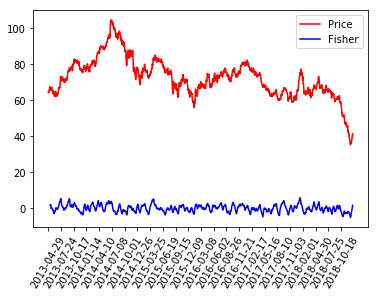

In [8]:
#Plot SLB price and Fisher
plt.plot(slb['close'], color='r', label='Price')
plt.plot(slb_fish, color='b', label='Fisher')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=60)
plt.show()

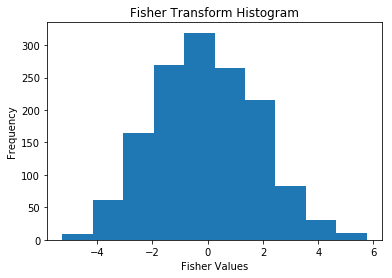

In [9]:
#Plot Histogram of Fisher distribution to show near normal distibution 
plt.hist(slb_fish)
plt.title('Fisher Transform Histogram')
plt.ylabel('Frequency')
plt.xlabel('Fisher Values')
plt.show()

In [241]:
slb.fisher.std()

1.87645944488795

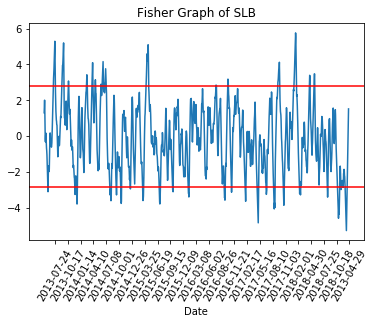

In [10]:
#Plot Fisher with lines at 1.5 Standard Deviation
plt.plot(slb_fish)
plt.xticks(dates, rotation=60)
plt.axhline(y=2.8146885, color='r', linestyle='-')
plt.axhline(y=-2.8146885, color='r', linestyle='-')
plt.title('Fisher Graph of SLB')
plt.xlabel('Date')
plt.show()

In [11]:
#We define a bull regime as when our strategy is bullish or bearish 
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
slb["Regime"] = np.where(slb['fisher'] < -2.8146885, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
slb["Regime"] = np.where(slb['fisher'] > 2.8146885, -1, slb["Regime"])
#slb["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = slb.loc[:, "Regime"].iloc[-1]
slb.loc[:, "Regime"].iloc[-1] = 0
slb["Signal"] = np.sign(slb["Regime"] - slb["Regime"].shift(1))
# Restore original regime data
slb.loc[:, "Regime"].iloc[-1] = regime_orig
slb.tail()

C:\Users\dylan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sign
  after removing the cwd from sys.path.
C:\Users\dylan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,symbol,close,high,low,open,volume,divCash,fisher,Regime,Signal
date,,,,,,,,,,
2019-01-03,SLB,37.60,38.59,36.86,37.31,20007856,0.0,-1.073110,0,0.0
2019-01-04,SLB,39.09,39.23,38.03,38.30,19506627,0.0,-0.296332,0,0.0
2019-01-07,SLB,40.17,40.47,38.95,39.21,15736883,0.0,0.388514,0,0.0
2019-01-08,SLB,40.67,41.00,40.23,40.77,13070196,0.0,0.987627,0,0.0
2019-01-09,SLB,41.24,41.62,40.74,41.26,17909216,0.0,1.522903,0,0.0


In [13]:
slb['Signal'].value_counts()

 0.0    1349
-1.0      43
 1.0      43
Name: Signal, dtype: int64

In [14]:
slb.loc[slb["Signal"] == 1, "close"]

date
2013-06-06     63.936309
2013-07-26     71.446427
2013-09-23     76.214219
2013-10-23     81.292832
2013-12-04     76.697001
2013-12-16     76.450952
2014-03-03     80.549059
2014-04-08     86.886362
2014-04-28     89.401865
2014-06-03     92.014254
2014-06-18     94.876132
2014-06-24     94.787529
2014-07-08    103.444045
2014-07-31     96.036831
2014-09-12     90.900451
2014-10-13     80.860673
2014-12-16     71.646199
2015-03-12     72.737616
2015-04-22     82.820592
2015-07-01     76.174972
2015-09-30     62.725269
2016-01-15     57.676290
2016-07-22     75.720507
2016-07-26     74.783395
2016-09-15     71.711209
2016-10-12     76.043761
2016-11-02     72.607599
2017-02-06     76.728914
2017-04-27     68.834471
2017-06-27     62.215074
2017-08-16     60.644467
2017-09-27     66.275069
2017-10-20     60.585851
2018-01-19     73.894789
2018-02-09     63.479536
2018-04-23     67.101930
2018-05-23     71.522809
2018-08-16     61.294802
2018-10-24     52.415984
2018-11-15     47.54

In [15]:
slb.loc[slb["Signal"] == -1, "close"]

date
2013-06-07     64.485830
2013-07-15     67.181099
2013-09-09     75.697602
2013-10-22     82.711341
2013-12-06     77.461511
2013-12-20     76.688214
2014-02-25     81.696481
2014-04-01     86.462698
2014-04-23     90.213887
2014-06-02     92.067415
2014-06-10     94.388815
2014-06-23     96.488707
2014-06-27    104.374377
2014-08-11     96.763376
2014-09-16     93.337031
2014-10-17     83.564032
2014-12-17     74.049595
2015-03-19     72.800523
2015-04-06     77.203961
2015-07-10     75.867742
2015-10-05     65.562776
2016-01-22     59.680909
2016-07-21     74.245252
2016-07-25     74.885457
2016-09-22     71.907294
2016-10-10     76.874789
2016-11-03     73.261217
2017-02-10     77.170371
2017-05-08     68.248566
2017-07-03     63.747605
2017-08-25     60.806287
2017-09-14     64.951102
2017-10-26     60.796918
2018-01-03     68.972982
2018-02-20     63.888516
2018-04-18     68.494410
2018-05-18     72.340769
2018-08-21     63.521385
2018-11-07     51.733716
2018-11-19     47.76

In [16]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
slb_signals = pd.concat([
        pd.DataFrame({"Price": slb.loc[slb["Signal"] == 1, "close"],
                     "Regime": slb.loc[slb["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": slb.loc[slb["Signal"] == -1, "close"],
                     "Regime": slb.loc[slb["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
slb_signals.sort_index(inplace = True)
slb_signals

,Price,Regime,Signal
date,,,
2013-06-06,63.936309,1,Buy
2013-06-07,64.485830,0,Sell
2013-07-15,67.181099,-1,Sell
2013-07-26,71.446427,0,Buy
2013-09-09,75.697602,-1,Sell
2013-09-23,76.214219,0,Buy
2013-10-22,82.711341,-1,Sell
2013-10-23,81.292832,0,Buy
2013-12-04,76.697001,1,Buy


In [17]:
slb_long_profits = pd.DataFrame({
        "Price": slb_signals.loc[(slb_signals["Signal"] == "Buy") &
                                  slb_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(slb_signals["Price"] - slb_signals["Price"].shift(1)).loc[
            slb_signals.loc[(slb_signals["Signal"].shift(1) == "Buy") & (slb_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": slb_signals["Price"].loc[
            slb_signals.loc[(slb_signals["Signal"].shift(1) == "Buy") & (slb_signals["Regime"].shift(1) == 1)].index
        ].index
    })
slb_long_profits

,Price,Profit,End Date
date,,,
2013-06-06,63.936309,0.549521,2013-06-07
2013-12-04,76.697001,0.764510,2013-12-06
2013-12-16,76.450952,0.237262,2013-12-20
2014-07-31,96.036831,0.726545,2014-08-11
2014-09-12,90.900451,2.436580,2014-09-16
2014-10-13,80.860673,2.703359,2014-10-17
2014-12-16,71.646199,2.403395,2014-12-17
2015-03-12,72.737616,0.062906,2015-03-19
2015-07-01,76.174972,-0.307230,2015-07-10


In [18]:
# We need to get the low of the price during each trade.
tradeperiods = pd.DataFrame({"Start": slb_long_profits.index,
                            "End": slb_long_profits["End Date"]})
slb_long_profits["low"] = tradeperiods.apply(lambda x: min(slb.loc[x["Start"]:x["End"], "low"]), axis = 1)
slb_long_profits

,Price,Profit,End Date,low
date,,,,
2013-06-06,63.936309,0.549521,2013-06-07,62.627927
2013-12-04,76.697001,0.764510,2013-12-06,76.011579
2013-12-16,76.450952,0.237262,2013-12-20,74.614372
2014-07-31,96.036831,0.726545,2014-08-11,94.185028
2014-09-12,90.900451,2.436580,2014-09-16,90.571424
2014-10-13,80.860673,2.703359,2014-10-17,76.476607
2014-12-16,71.646199,2.403395,2014-12-17,70.109456
2015-03-12,72.737616,0.062906,2015-03-19,71.344692
2015-07-01,76.174972,-0.307230,2015-07-10,74.295447


In [19]:
# Now we have all the information needed to simulate this strategy in apple_adj_long_profits
cash = 1000000
slb_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .3 # Max proportion of portfolio bet on any trade
batch = 100      # Number of shares bought per batch
stoploss = .2   # % of trade loss that would trigger a stoploss
for index, row in slb_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    # Add a row to the backtest data frame containing the results of the trade
    slb_backtest = slb_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)
 
slb_backtest

,Start Port. Value,End Port. Value,End Date,Shares,Share Price,Trade Value,Profit per Share,Total Profit,Stop-Loss Triggered
2013-06-06,1.000000e+06,1.002528e+06,2013-06-07,4600.0,63.936309,294107.023182,0.549521,2527.795697,0.0
2013-12-04,1.002528e+06,1.005509e+06,2013-12-06,3900.0,76.697001,299118.304396,0.764510,2981.587132,0.0
2013-12-16,1.005509e+06,1.006435e+06,2013-12-20,3900.0,76.450952,298158.713135,0.237262,925.320144,0.0
2014-07-31,1.006435e+06,1.008687e+06,2014-08-11,3100.0,96.036831,297714.177547,0.726545,2252.289192,0.0
2014-09-12,1.008687e+06,1.016728e+06,2014-09-16,3300.0,90.900451,299971.488441,2.436580,8040.714912,0.0
2014-10-13,1.016728e+06,1.026730e+06,2014-10-17,3700.0,80.860673,299184.490797,2.703359,10002.428814,0.0
2014-12-16,1.026730e+06,1.036824e+06,2014-12-17,4200.0,71.646199,300914.036651,2.403395,10094.260613,0.0
2015-03-12,1.036824e+06,1.037089e+06,2015-03-19,4200.0,72.737616,305497.988241,0.062906,264.206316,0.0
2015-07-01,1.037089e+06,1.035860e+06,2015-07-10,4000.0,76.174972,304699.888107,-0.307230,-1228.920071,0.0
2015-09-30,1.035860e+06,1.049763e+06,2015-10-05,4900.0,62.725269,307353.818194,2.837507,13903.782989,0.0


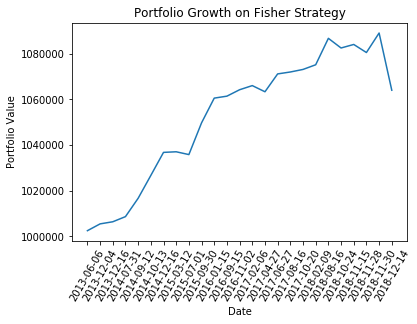

In [21]:
plt.plot(slb_backtest["End Port. Value"])
plt.xticks(slb_backtest.index, rotation=60)
plt.title('Portfolio Growth on Fisher Strategy')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.show()

## Fisher Transform Section Outline

For investors who would like to actively trade, the Fisher Transform is a useful indicator for finding buy and sell signals. Created and introduced by John Ehlers in 2002, the Fisher Transform takes price as an input and "transforms" it into an approximately Gaussian distribution. Overlaying the price chart of an asset with its Fisher Transform output can lead to insights for traders. In this section, a strategy of buying when the selected asset's Fisher Transform value goes below 1.5 standard deviatons and selling when the asset's Fisher Transform value goes above 1.5 stantdard deviatons is tested. Schlumberger (SLB) is the selected asset in this study. 

- First, the histogram of the Fisher Transfrom values shows the new Gaussian representation of the SLB price:
    -  Image of histogram
- Next, two lines, the first at 2.8146 and the second at -2.8146, are plotted over the SLB Fisher Transform values to represent the range between 1.5 standard deviations.
    -  Image of Fisher plot wiht red lines
- The DataFrame of all trades shows the start dates, end dates, and profits for each trade executed by the strategy.
    - Show DataFrame of slb_long_profits
- Next, the results of the backtesting of the strategy are shown. The backtest assumes a 1 million dollar portfolio size. It also assumes trade postion sizes of 100 shares, that no more than 30% of the portfolio is put into one trade, and the execution of a stop loss if 20% of the portfolio will be lost.
    -  Display slb_backtest DataFrame
    -  Image of portfolio growth is shown
- As seen in the image above, the strategy yields roughly an 9% portfolio return over the time of interest. These arent phenomenal returns, but still beat inflation significatly. The dip at the end of the graph is due to lack of data. If the strategy were extended to present day, the dip would turn positive and the strategy would yield even greater returns.